# WeatherPy
----

### Analysis results
* According to the plot there is a relationship between the city latitude and the temperature. There is a warmer weather in cities which are close to the equator (0 degrees latitide) and the weather becomes colder as cities becomes distant from the equator;
* There is no significant relationship between the city latitude and the wind speed. But it should be mentioned that the widest range of the wind speed are observed at 80 degrees latitude;
* There is no significant relationship between the city latitude and the humidity. But most sample cities have the humidity rate higher than 40%.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [42]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [43]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [44]:
city_names = []
lat = []
temp = []
hum = []
cloud = []
wind = []
record_num = 0

In [45]:
# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city_names.append(response['name'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        record_num += 1
        print("Processing record " + str(record_num) + "|" + str(city_names[-1]))
    except KeyError:
        print("City not found. Skipping...")


Beginning Data Retrieval
-----------------------------
Processing record 1|Nikolskoye
Processing record 2|Vaini
Processing record 3|Nadym
Processing record 4|Mar del Plata
Processing record 5|Naron
City not found. Skipping...
Processing record 6|Punta Arenas
Processing record 7|Kaitangata
Processing record 8|Victoria
Processing record 9|Goundam
Processing record 10|Avarua
Processing record 11|Kodiak
City not found. Skipping...
Processing record 12|Manaure
Processing record 13|Hilo
Processing record 14|Mataura
Processing record 15|Ilo
Processing record 16|Muravlenko
Processing record 17|Bluff
Processing record 18|Manggar
Processing record 19|Sobolevo
Processing record 20|Honningsvag
Processing record 21|Saint Anthony
Processing record 22|Hermanus
City not found. Skipping...
Processing record 23|Sinazongwe
Processing record 24|Quilmana
Processing record 25|Khatanga
Processing record 26|Wukari
Processing record 27|Mareeba
Processing record 28|Mahebourg
Processing record 29|Sovetskiy
Proce

Processing record 243|Pottstown
Processing record 244|Panaba
Processing record 245|Abreus
Processing record 246|Koumac
Processing record 247|Chigasaki
City not found. Skipping...
Processing record 248|Kinsale
Processing record 249|Beringovskiy
Processing record 250|Talnakh
Processing record 251|Alofi
City not found. Skipping...
Processing record 252|Kindu
Processing record 253|Yokadouma
Processing record 254|Codrington
Processing record 255|Goulburn
Processing record 256|Portoferraio
Processing record 257|Airai
Processing record 258|Islampur
Processing record 259|Kavieng
Processing record 260|Ilinskiy
Processing record 261|Gubkinskiy
Processing record 262|Yellowknife
City not found. Skipping...
Processing record 263|Tuy Hoa
Processing record 264|Port Macquarie
Processing record 265|Marawi
Processing record 266|Coquimbo
Processing record 267|Vanimo
Processing record 268|Evensk
Processing record 269|Corinto
Processing record 270|Ventspils
Processing record 271|Tambovka
Processing record 

Processing record 473|Willowmore
Processing record 474|Erzin
Processing record 475|Masindi
Processing record 476|Rayong
Processing record 477|Alice Springs
Processing record 478|Santiago de Compostela
Processing record 479|Komsomolskiy
Processing record 480|Bendigo
Processing record 481|Gidole
Processing record 482|Yakeshi
Processing record 483|Leh
Processing record 484|Caetite
Processing record 485|Taoudenni
Processing record 486|Beruwala
Processing record 487|Tagusao
Processing record 488|Carauari
Processing record 489|Kosh-Agach
Processing record 490|Portage
Processing record 491|Soyo
Processing record 492|Marly
Processing record 493|Babai
Processing record 494|Diffa
Processing record 495|Iracoubo
Processing record 496|Okhotsk
Processing record 497|Helong
Processing record 498|Ouallam
Processing record 499|Souillac
Processing record 500|Namibe
Processing record 501|Umm Kaddadah
City not found. Skipping...
Processing record 502|Gambo
Processing record 503|Weinan
Processing record 504

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
weather_dict = {
                "City": city_names,
                "Latitude": lat,
                "Temperature (F)": temp,
                "Humidity (%)": hum,
                "Cloudiness (%)": cloud,
                "Wind Speed (mph)": wind}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Nikolskoye,59.70,33.37,86,75,8.95
1,Vaini,15.34,68.94,85,0,2.04
2,Nadym,65.53,26.01,81,24,12.21
3,Mar del Plata,-46.43,58.77,67,0,11.43
4,Naron,43.52,53.31,54,0,6.93


In [55]:
weather_data.count()


City                527
Latitude            527
Temperature (F)     527
Humidity (%)        527
Cloudiness (%)      527
Wind Speed (mph)    527
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

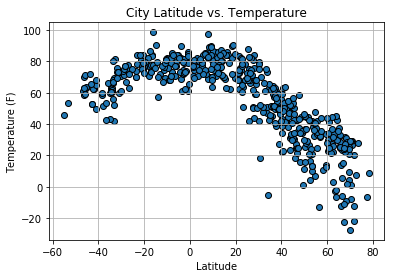

In [62]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Temperature (F)"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data\latitude_vs_temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

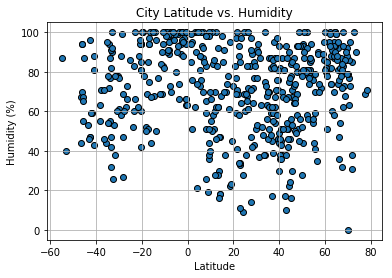

In [63]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity (%)"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data\latitude_vs_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

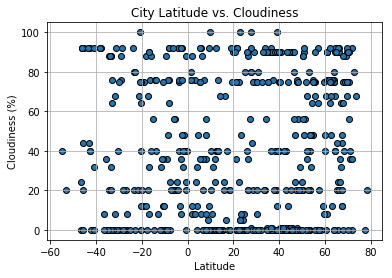

In [64]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data\latitude_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

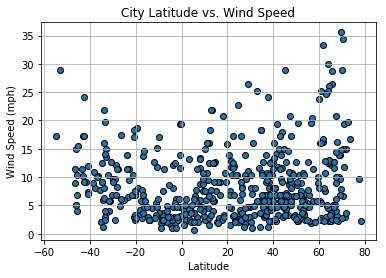

In [65]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (mph)"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data\latitude_vs_wind_speed.png")

# Show plot
plt.show()